In [2]:
import pandas as pd

data = pd.read_csv('titanic.csv')

In [3]:
missing_values = data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Drop rows with any missing values
#data = data.dropna()

In [5]:
# Fill missing values in 'Age' column with the mean
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Fill missing values in 'Cabin' column with the median
data['Cabin'].fillna('Unknown', inplace=True)

<Axes: >

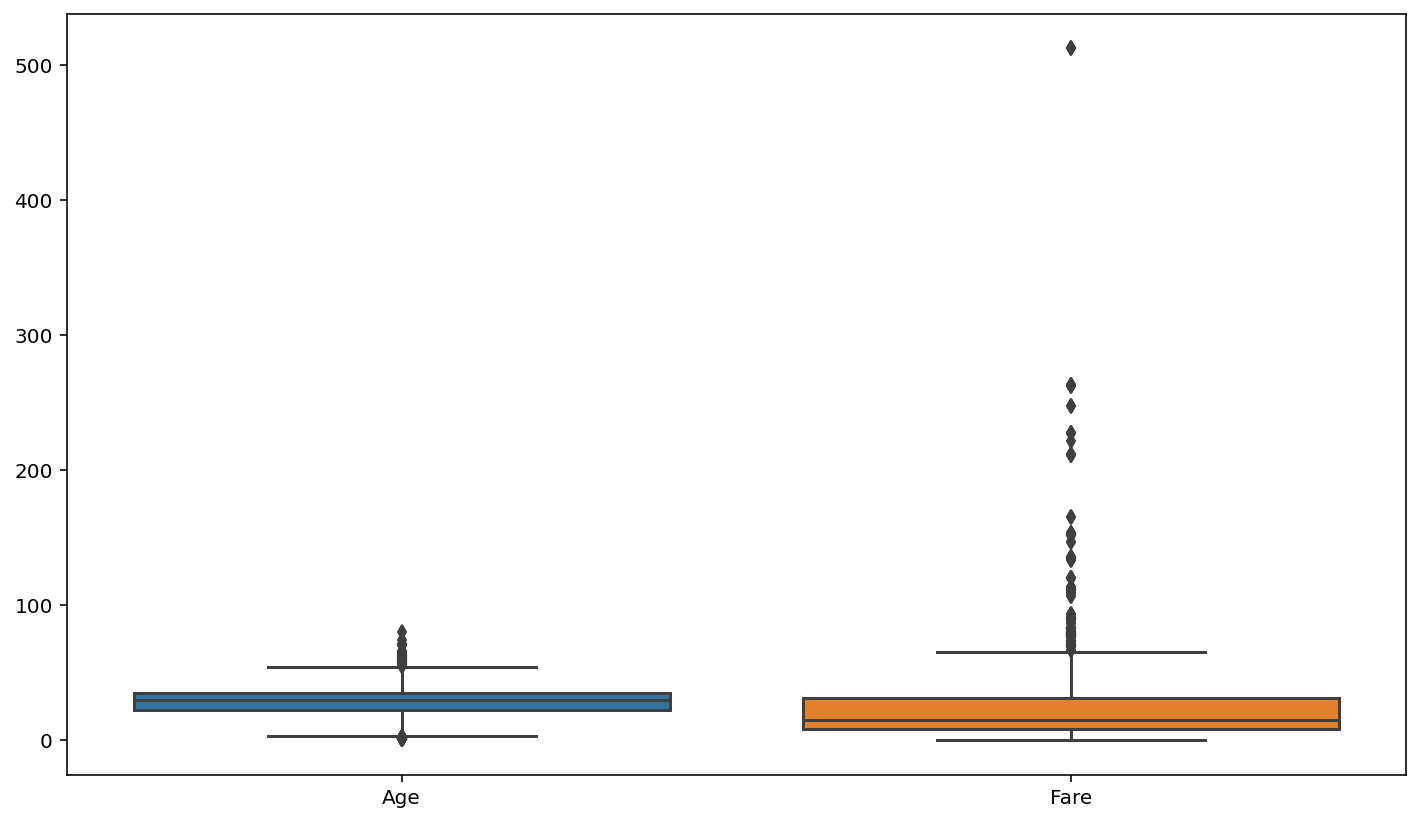

In [6]:
#Boxplot Visualisation
import seaborn as sns

sns.boxplot(data=data[['Age', 'Fare']])


In [8]:
#Z-Score Method
from scipy.stats import zscore

# Calculate z-scores for 'Age' and 'Fare' columns
z_scores_age = zscore(data['Age'])
z_scores_fare = zscore(data['Fare'])

# Find outliers based on z-score threshold (e.g., 3)
outliers_age = data['Age'][abs(z_scores_age) > 3]
outliers_fare = data['Fare'][abs(z_scores_fare) > 3]

print('Outliers in Age:', outliers_age)
print('Outliers in Fare:', outliers_fare)


Outliers in Age: 96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
Outliers in Fare: 27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


In [9]:
# Apply Z-score normalization to 'Age' and 'Fare' columns
data['Age_normalized'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()
data['Fare_normalized'] = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()


In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_normalized,Fare_normalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,-0.592148,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0.638430,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,-0.284503,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0.407697,0.420494
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,0.407697,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,-0.207592,-0.386454
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,-0.822881,-0.044356
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,0.000000,-0.176164
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,-0.284503,-0.044356
